In [1]:
import sys
import time
import numpy as np
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (10,10)
import matplotlib.pyplot as plt
np.random.seed(0)
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D

In [2]:
sys.path.append('../libs/')
import gen
from knn import Knn
#from instance import Instance
#import instance
from gen import Individual, GanAlg

PLOT_SIZE=(15, 12)
PLOT_SIZE=(7, 6)
LOW_LIMIT = -3*np.pi
HIGH_LIMIT = 3*np.pi

In [3]:
#Define fitness function
def fit_fun(x):
    return 3+3*np.cos((np.abs(x[0])+np.abs(x[1]))/10)+(np.cos(x[0])*np.cos(x[1]))

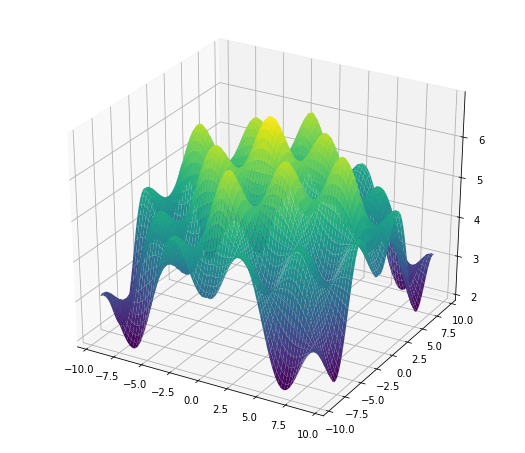

In [4]:
#Plot fitness landscape as 3D graph
X = np.arange(LOW_LIMIT, HIGH_LIMIT, 0.25)
Y = np.arange(LOW_LIMIT, HIGH_LIMIT, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fit_fun((X, Y))

fig = plt.figure(figsize=PLOT_SIZE)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

In [5]:
#Prepare object for genetic algorithm
gen = GanAlg(fit_fun, area=(LOW_LIMIT, HIGH_LIMIT, LOW_LIMIT, HIGH_LIMIT))

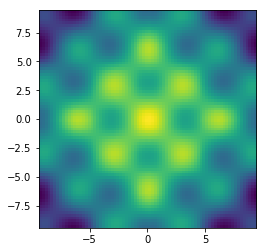

In [6]:
#Plot fitness landscape as heatmap
#fig = plt.figure(figsize=PLOT_SIZE)
#plt.imshow(Z)
gen._draw_fit(plt.gca())
plt.show()

In [7]:
#Create individuals
INST_CNT = 300
indiv = []
for i in range(INST_CNT):
    x = Individual([np.random.uniform(LOW_LIMIT, HIGH_LIMIT), np.random.uniform(LOW_LIMIT, HIGH_LIMIT)])
    indiv.append(x)

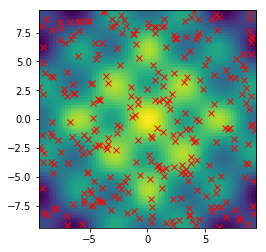

In [8]:
gen.individuals = indiv
gen._draw_ind(plt.gca())
plt.show()

In [9]:
#calculate fitness
gen.calc_fit()

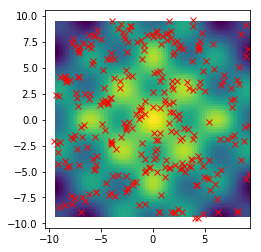

In [10]:
gen.make_selection()
gen._draw_ind(plt.gca())
plt.show()

<IPython.core.display.Javascript object>


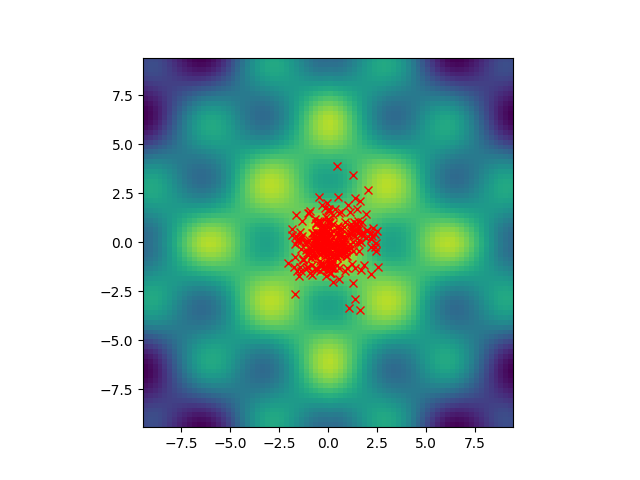

In [30]:
%matplotlib notebook
fig,ax = plt.subplots(1,1)
for i in range(0, 10):
    gen.make_selection()
    ax.clear()
    gen._draw_ind(ax)
    time.sleep(1)
    fig.canvas.draw() 